Metrics

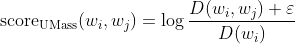

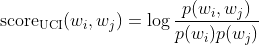

In [1]:
import pandas as pd
import numpy as np
import os
import re
from string import punctuation

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.spatial.distance import cosine
import ast

import ast
import fasttext
import itertools
import math
import pickle
import pprint

import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
import spacy
from gensim.models import CoherenceModel

from sklearn.cluster import KMeans
from collections import defaultdict, Counter

from tqdm import tqdm
tqdm.pandas()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import Counter
import cosinescore

from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import json
import mutualinfo

from itertools import chain

In [2]:
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary

In [3]:
df = pd.read_csv('./Datasets/2021-07-14 dataset_all.csv')

In [7]:
df['text_clean'] = df.text_clean.map(ast.literal_eval)

In [10]:
words = pd.read_excel("./Datasets/2021-07-11 tokens_with_multiple_words.xlsx")

75 tokens

In [23]:
df.text.iloc[1900]

'On this auspicious occasion, the seventieth anniversary of the United\nNations, I am honoured to address the Assembly on behalf of the Government and people of Liberia. I congratulate the President on his election to preside over the Assembly, and I appreciate the stewardship of his predecessor, His Excellency Mr. Sam Kutesa, who ably conducted the Assembly’s affairs at the sixty-ninth session.\nThis year has registered ground-breaking developments. After 50 years, the United States and Cuba have decided to resolve differences by establishing diplomatic relations. Another milestone was the adoption here, a few days ago, of the post-2015 development agenda, “Transforming our world: the 2030 Agenda for Sustainable Development” (resolution 70/1), by which we committed to implementing measures to transform the lives of our peoples — to lift them from poverty to prosperity — and to preserve the planet. It was this same vision that, 70 years ago, motivated the founding of this global organi

In [17]:
set(words[0].tolist())

{'antigua and barbuda',
 'arms race',
 'bosnia and herzegovina',
 'brunei darussalam',
 'burkina faso',
 'cabo verde',
 'central african republic',
 'chemical weapons',
 'climate change',
 'cold war',
 'congo republic',
 'costa rica',
 'cote divoire',
 'czech republic',
 'developed countries',
 'developed states',
 'developing countries',
 'developing states',
 'dominican republic',
 'dr congo',
 'economic development',
 'economic growth',
 'el salvador',
 'equatorial guinea',
 'european union',
 'general assembly',
 'global south',
 'human rights',
 'international court of justice',
 'kyrgyz republic',
 'latin america',
 'marshall islands',
 'micronesia, fed sts',
 'middle east',
 'millenium goals',
 'millennium development goals',
 'new zealand',
 'non proliferation',
 'north america',
 'north korea',
 'not found',
 'nuclear proliferation',
 'nuclear weapons',
 'official development assistance',
 'papua new guinea',
 'peace keeping',
 'rule of law',
 'san marino',
 'sao tome and prin

In [4]:
dfa = pd.read_csv('./Datasets/2021-07-19 embedding_df.csv')

In [9]:
dfa.head()

,Unnamed: 0,year,country,text,session,country_map,is_war,n_conflicts,total_deaths,incompatibility,...,type_of_conflict,conflict_before,no_tokens,countryname,continent,sentences,sentences_multiple_tokens,text_clean,sentences_full,embeddings_sbert
0,0,1970,CMR,: A year ago I came here as the Acting Preside...,25,NaN,False,0,0.0,No incompatibility,...,No conflict,No conflict,2814,Cameroon,AF,"[['a', 'year', 'ago', 'i', 'came', 'here', 'as...","[['a', 'year', 'ago', 'i', 'came', 'here', 'as...","['a', 'year', 'ago', 'i', 'came', 'here', 'as'...",['A year ago I came here as the Acting Preside...,[[-0.19020231 0.2700747 -0.46475238 ... 0.1...
1,1,1971,CMR,"186.\t Mr. President, on behalf of the delegat...",26,NaN,False,0,0.0,No incompatibility,...,No conflict,No conflict,2712,Cameroon,AF,"[['mr', 'president', 'on', 'behalf', 'of', 'th...","[['mr', 'president', 'on', 'behalf', 'of', 'th...","['mr', 'president', 'on', 'behalf', 'of', 'the...","['Mr. President, on behalf of the delegation o...",[[-0.1808214 0.41667518 0.16697055 ... 0.2...
2,2,1972,CMR,"Mr. President, since I am speaking from this r...",27,NaN,False,0,0.0,No incompatibility,...,No conflict,No conflict,3459,Cameroon,AF,"[['mr', 'president', 'since', 'i', 'am', 'spea...","[['mr', 'president', 'since', 'i', 'am', 'spea...","['mr', 'president', 'since', 'i', 'am', 'speak...","[""Mr. President, since I am speaking from this...",[[-0.420066 0.4901679 -0.03868627 ... 0.5...
3,3,1974,CMR,"For many years, from this rostrum and others,...",29,NaN,False,0,0.0,No incompatibility,...,No conflict,No conflict,3086,Cameroon,AF,"[['for', 'many', 'years', 'from', 'this', 'ros...","[['for', 'many', 'years', 'from', 'this', 'ros...","['for', 'many', 'years', 'from', 'this', 'rost...","['For many years, from this rostrum and others...",[[-0.06388035 0.24733873 -0.01689987 ... -0.0...
4,4,1975,CMR,"69.\t Mr. President, as 1 come to this rostrum...",30,NaN,False,0,0.0,No incompatibility,...,No conflict,No conflict,4150,Cameroon,AF,"[['mr', 'president', 'as', 'come', 'to', 'this...","[['mr', 'president', 'as', 'come', 'to', 'this...","['mr', 'president', 'as', 'come', 'to', 'this'...","['Mr. President, as 1 come to this rostrum wit...",[[-0.2020001 0.44900396 0.10473768 ... 0.2...


In [3]:
common_dictionary = Dictionary(common_texts)
common_corpus = [common_dictionary.doc2bow(text) for text in common_texts]

In [4]:
common_dictionary

# Preparation of data

In [5]:
import re
import nltk

In [6]:
dfa = pd.read_csv('./Datasets/2021-07-16 data_africa.csv')

In [7]:
stopwords = pd.read_csv('../Supplementary files/stopwords.txt', header=None)
stopwords = stopwords[0].tolist()

Remove punctuation

In [3]:
# Define function to clean text
def clean(text):
    text = re.sub("[^a-zA-Z']", " ", text)
    text = ' '.join([w.lower() for w in text.split()])
    return text.split()

In [9]:
dfa['text_clean'] = dfa['text'].map(clean)

In [10]:
data_words = list(dfa.text_clean)

In [304]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

In [305]:
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [306]:
def remove_stopwords(texts):
    """Removing stopwords"""
    return [[word for word in simple_preprocess(str(doc)) if word not in stopwords] for doc in texts]

In [307]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

I Lemmatize all the nouns, adjectives, verbs, and adverbs. 

In [310]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)


In [311]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [312]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Topic Modeling

## LDA

Write-up my process: 
- The importance and logic behind the model
- The process; 
- The decisions (e.g. for cleaning)
- The fine-tuning graphs

### Building the prototype

In [313]:
# Build LDA model
# K = 20
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=20,  # Since I am doing k=20
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [315]:
scores_lda = get_traditional_scores(lda_model, data_lemmatized, id2word)
print(scores_lda)

{'u_mass': -0.6088353560720332, 'c_uci': -0.5170850234403691, 'c_npmi': -0.01949243650764946}


In [320]:
# Build LDA model
# K = 20
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       alpha='asymmetric',
                                       eta=0.2575,
                                       id2word=id2word,
                                       num_topics=20,  # Since I am doing k=20
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [321]:
scores_lda = get_traditional_scores(lda_model, data_lemmatized, id2word)
print(scores_lda)

{'u_mass': -0.6602112036784472, 'c_uci': -1.192565727746926, 'c_npmi': -0.03941111761679877, 'c_v': 0.3118712638157915}


**Assumes that each word belongs to a topic. Thus, intra-cosine similarity of word embeddings. Note this when creating the table**

In [21]:
words_topics = lda_model.get_topic_terms(0, topn=999999999999)

In [22]:
def get_word_topics(lda_model, num_topics=20, topn=9999999):
    """Get word topics for each topic"""
    topic_dict = {}
    for k in range(num_topics):
        words_topic = lda_model.get_topic_terms(k, topn=topn)
        topic_dict[k] = [id2word[x[0]] for x in words_topic]
        
    return topic_dict

In [23]:
topics_dict = get_word_topics(lda_model)

In [27]:
x=lda_model.show_topics(num_topics=12, num_words=5,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

#Below Code Prints Topics and Words
for topic,words in topics_words:
    print(str(topic)+ "::"+ str(words))
print()

#Below Code Prints Only Words 
for topic,words in topics_words:
    print(" ".join(words))

8::['people', 'international', 'country', 'peace', 'world']
17::['international', 'country', 'people', 'state', 'world']
14::['peace', 'country', 'international', 'conflict', 'government']
4::['country', 'people', 'international', 'peace', 'development']
6::['country', 'international', 'world', 'peace', 'people']
7::['zaire', 'genocide', 'rwanda', 'rwandan', 'congo']
13::['country', 'world', 'people', 'international', 'problem']
18::['tion', 'sion', 'ment', 'alir', 'aggre']
10::['world', 'people', 'country', 'year', 'human']
2::['territory', 'resolution', 'economic', 'operation', 'region']
16::['eritrea', 'peace', 'eritrean', 'ethiopian', 'international']
15::['international', 'country', 'peace', 'security', 'effort']

people international country peace world
international country people state world
peace country international conflict government
country people international peace development
country international world peace people
zaire genocide rwanda rwandan congo
country world peo

In [316]:
# Get the coherence scores

def get_traditional_scores(model, data, id2word, metrics=['u_mass', 'c_uci', 'c_npmi', 'c_v']):
    """Get Umass, uci, npmi scores"""
    
    scores_dict = {}
    for metric in metrics:
        # Get the coherence model
        CM = CoherenceModel(model=model, texts=data, dictionary=id2word, coherence=metric)
        results = CM.get_coherence()
        
        scores_dict[metric] = results
        
    return scores_dict

In [130]:
scores_lda = get_traditional_scores(lda_model, data_lemmatized, id2word)

In [131]:
scores_lda

{'u_mass': -0.6190825664713868,
 'c_uci': -0.6717176097410548,
 'c_npmi': -0.024580403245765547}

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

### Fine-tuning LDA

In [40]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
num_of_docs = len(corpus)

Change alpha and beta params (logarithmic scaling)

In [286]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter 
alpha = list(np.linspace(0.01,1,5))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.linspace(0.01,1,5))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
model_results = {'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if True:
    n_iters = len(alpha) * len(beta)
    pbar = tqdm.tqdm(total=n_iters)

    # iterate through alpha values
    for a in alpha:
        # iterare through beta values
        for b in beta:
            # get the coherence score for the given parameters
            cv = compute_coherence_values(corpus=corpus, dictionary=id2word, 
                                          k=20, a=a, b=b)
            # Save the model results
            model_results['Alpha'].append(a)
            model_results['Beta'].append(b)
            model_results['Coherence'].append(cv)

            pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()


100%|███████████████████████████████████████████████████████████████████████████████| 42/42 [2:39:51<00:00, 228.38s/it]


In [200]:
res_df = pd.read_csv('./Datasets/2021-07-19 lda_tuning_results.csv')

In [318]:
res_df.sort_values('Coherence')

,Alpha,Beta,Coherence
10,0.2575,1.0,0.257827
4,0.01,1.0,0.264497
22,0.7525,1.0,0.266177
16,0.505,1.0,0.266202
34,symmetric,1.0,0.266459
40,asymmetric,1.0,0.274865
28,1.0,1.0,0.275061
27,1.0,0.7525,0.283178
29,1.0,symmetric,0.285971
24,1.0,0.01,0.288209


In [ ]:
sns.heatmap()

In [218]:
plt.rcParams.update({
    "text.usetex": False})

In [205]:
tuning_lda = pd.pivot_table(index='Alpha', columns='Beta', values='Coherence', data=res_df)

In [237]:
tuning_lda.index

Index(['0.01', '0.2575', '0.505', '0.7525', '1.0', 'asymmetric', 'symmetric'], dtype='object', name='Alpha')

In [241]:
c = ['asymmetric','symmetric']

In [242]:
tuning_lda.index = [np.round(float(x),2) if x not in c else x for x in tuning_lda.index]

In [244]:
tuning_lda.columns = [np.round(float(x),2) if x not in c else x for x in tuning_lda.columns]

In [245]:
cmap = sns.diverging_palette(20,230, as_cmap=True)

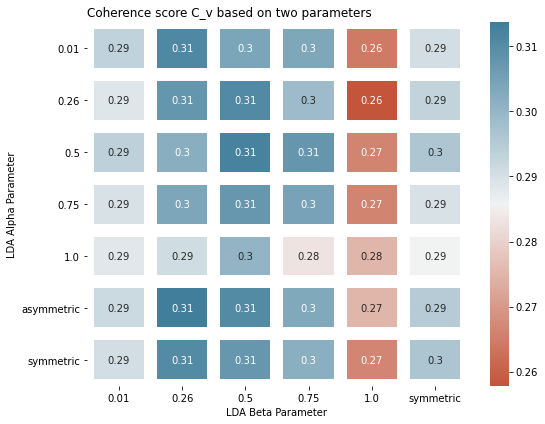

In [301]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(tuning_lda, linewidth=12, ax=ax, cmap=cmap, annot=True)
ax.set_title("Coherence score C_v based on two parameters", loc='left')
ax.set_xlabel("LDA Beta Parameter")
ax.set_ylabel("LDA Alpha Parameter")

plt.tight_layout()

fig.savefig('./Figures/2021-07-20 LDA_coherence.pdf')

In [202]:
res_df[res_df.Coherence == res_df.Coherence.max()]

,Alpha,Beta,Coherence
37,asymmetric,0.2575,0.313684


## LSI

### Model prototype

Question: Should you preprocess LSA (with lemmatization and stuff) for better coherence?

In [326]:
from gensim.models import LsiModel

In [327]:
LSI =  LsiModel(corpus=corpus,
       id2word=id2word,
       num_topics=20,  # Since I am doing k=20
       chunksize=100)

In [328]:
scores_LSI = get_traditional_scores(LSI, data_lemmatized, id2word)

In [329]:
scores_LSI

{'u_mass': -0.3885613771168056,
 'c_uci': -0.1633714847463598,
 'c_npmi': -0.008631465259972514,
 'c_v': 0.29316693260103893}

##  Hierarchhical Dirichlet Process

**Infers the number of topics from the data. But, I adjust the $T$ parameter, the top level truncation level, to 20**

### Model prototype

In [297]:
from gensim.models import HdpModel

In [298]:
"""Fine tune:
- kappa - learning parameter which acts as exponential decay factor to influence extent of learning from each batch (0.1, 10)
- tau - learning parameter which down-weights early iterations of documents (1, 100)
- alpha - concentration parameter (0.01, 5)
- gamma - concentration parameter (0.01, 5)
- eta (0.001, 1)
- """

'Fine tune:\n- kappa - learning parameter which acts as exponential decay factor to influence extent of learning from each batch (0.1, 10)\n- tau - learning parameter which down-weights early iterations of documents (1, 100)\n- alpha - concentration parameter (0.01, 5)\n- gamma - concentration parameter (0.01, 5)\n- eta (0.001, 1)\n- '

In [322]:
# Run the model
hdp_model = HdpModel(corpus=corpus,
                id2word=id2word,
                random_state=100,
                chunksize=100,
                T=20)

In [323]:
from sklearn.model_selection import RandomizedSearchCV

In [325]:
scores_hdp = get_traditional_scores(hdp_model, data_lemmatized, id2word)
print(scores_hdp)

{'u_mass': -6.555223403230007, 'c_uci': -2.6966723289234302, 'c_npmi': -0.10274530093761554, 'c_v': 0.39898677448628483}


In [ ]:
# Run the model
hdp_model = HdpModel(corpus=corpus,
                id2word=id2word,
                random_state=100,
                chunksize=100,
                T=20)

### Fine-tuning the HDP model

In [169]:
# Get the required number of parameters
k_prm = 10
search_params = {'kappa': np.linspace(0.1, 10 , k_prm),
                 'tau': np.linspace(1, 100, k_prm),
                 'alpha': np.linspace(0.01, 5, k_prm),
                 'gamma': np.linspace(0.01, 5, k_prm),
                 'eta': np.linspace(0.001, 1, k_prm)}

In [24]:
import pandas as pd

In [25]:
params = pd.read_excel("./Datasets/2021-07-27 hyperparams HDP.xlsx")

In [32]:
params.loc[1, 'Parameter explanation']

'Learning parameter which down-weights early iterations of documents.'

In [29]:
print(params.to_latex(index=False))

\begin{tabular}{lrrrl}
\toprule
Unnamed: 0 &  Min value &  Max value &  Final value &                              Parameter explanation \\
\midrule
     kappa &      0.010 &          5 &         1.00 & Learning parameter which acts as exponential de... \\
       tau &      1.000 &        100 &        64.00 & Learning parameter which down-weights early ite... \\
     alpha &      0.010 &          5 &         1.00 &                         Second-level concentration \\
     gamma &      0.010 &          5 &         1.00 &                          First-level concentration \\
       eta &      0.001 &          1 &         0.01 &                                The topic Dirichlet \\
\bottomrule
\end{tabular}



In [288]:
def get_params(search_params=search_params):
    """Get a random set of parameters for HDP"""
    useparams = {}
    for col in search_params.keys():
        useparams[col] = random.choice(search_params[col])
        
    return useparams

In [289]:
scores_general = {}
scores_params = {}
for iter_ in range(10):
    
    # Get params
    useparams = get_params()
    
    # Run the model
    hdp_model = HdpModel(corpus=corpus,
                    id2word=id2word,
                    random_state=100,
                    chunksize=100,
                    T=20,
                    **useparams)
    
    # Get scores and add them to dictionary
    scores_hdp = get_traditional_scores(hdp_model, data_lemmatized, id2word)
    scores_general[iter_] = scores_hdp
    scores_params[iter_] = useparams

  0%|                                                                                         | 0/42 [3:50:27<?, ?it/s]


In [280]:
sg = pd.read_csv('./Datasets/2021-07-19 scores_general.csv').transpose()
sp = pd.read_csv('./Datasets/2021-07-19 scores_params.csv').transpose()

In [285]:
def change_header(df):
    df.columns = df.iloc[0]
    df = df[1:]
    
    #df.drop('Unnamed: 0', axis=1)
    return df

In [286]:
sg = change_header(sg)
sp = change_header(sp)
sres = sp.merge(sg, right_index=True, left_index=True)

In [295]:
sres

Unnamed: 0,kappa,tau,alpha,gamma,eta,u_mass,c_uci,c_npmi
0,8.9,56.0,1.118889,1.673333,0.445,-18.268145,-6.279937,-0.226797
1,5.6,100.0,0.01,1.118889,0.112,-18.268145,-6.279937,-0.226797
2,6.7,67.0,4.445556,4.445556,0.667,-18.268145,-6.279937,-0.226797
3,8.9,45.0,2.782222,1.118889,0.556,-18.268145,-6.279937,-0.226797
4,10.0,89.0,2.782222,3.891111,0.889,-18.268145,-6.279937,-0.226797
5,6.7,89.0,2.227778,3.891111,1.0,-18.268145,-6.279937,-0.226797
6,2.3,34.0,2.782222,1.673333,0.778,-17.044481,-5.931382,-0.214617
7,4.5,34.0,0.564444,4.445556,0.001,-18.268145,-6.279937,-0.226797
8,6.7,34.0,0.01,1.673333,0.667,-18.268145,-6.279937,-0.226797
9,4.5,100.0,2.782222,3.891111,0.112,-18.268145,-6.279937,-0.226797


## Clustering with Sentence BERT

Man nereikia atsekti siuo metu jokio cluster iki post lygio, tik veliau reikes

### Getting embeddings

In [10]:
import ast
from tqdm import tqdm
tqdm.pandas()

In [8]:
dfa['sentences_multiple_tokens'] = dfa.sentences_multiple_tokens.progress_map(ast.literal_eval)

100%|██████████████████████████████████████████████████████████████████████████████| 2426/2426 [00:42<00:00, 57.06it/s]


In [9]:
s = dfa.text.iloc[0]

In [87]:
# Define function to clean text
def clean(text):
    text = re.sub("[^a-zA-Z0-9\,\;\.\-']", " ", text)
    text = ' '.join([w for w in text.split()])
    return text

In [88]:
from nltk import tokenize

In [89]:
def convert_to_sentences(s):
    return [x for x in tokenize.sent_tokenize(clean(s)) if len(x.split()) > 2]

In [90]:
dfa['sentences_full'] = dfa.text.progress_map(convert_to_sentences)

100%|██████████████████████████████████████████████████████████████████████████████| 2426/2426 [00:27<00:00, 86.67it/s]


In [14]:
# Import sentence transformer
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

C:\Users\Paulius\anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [15]:
def calculate_embeddings(s):
    embeddings = model.encode(s)
    return embeddings

In [16]:
dft = dfa.sample(10)

In [17]:
dft['embeddings_sbert'] = dft['sentences_full'].progress_map(calculate_embeddings)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:22<00:00,  2.25s/it]


In [ ]:
dfa['embeddings_sbert'] = dfa['sentences_full'].progress_map(calculate_embeddings)

In [ ]:
dfa.to_csv('2021-07-19 embedding_df.csv')

In [27]:
dfa['embeddings_sbert'] = dfa['sentences_full'].progress_map(calculate_embeddings)

100%|████████████████████████████████████████████████████████████████████████████| 2426/2426 [1:29:39<00:00,  2.22s/it]


In [29]:
embeds_ls = list(dfa['embeddings_sbert'])
embeds_ls = list(chain.from_iterable(embeds_ls))

In [30]:
dfa.to_csv('2021-07-19 embedding_df.csv')

### Clustering

In [175]:
def get_kmeans(embeds_ls):
    
    # Instantiate kmeans
    kmeans = KMeans(n_clusters=20, n_init=11, max_iter=10_000, n_jobs=-1)
    kmeans.fit(embeds_ls)
    
    # Get labels
    labels = kmeans.labels_
    labels_all = np.unique(labels)
    
    return kmeans, labels, labels_all

In [ ]:
kmeans, labels, labels_all = get_kmeans(embeds_ls)

In [34]:
import pickle

with open('2021-07-19 kmeans.pickle', 'wb') as handle:
    pickle.dump(kmeans, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [41]:
pd.Series(labels).value_counts()

0     18983
14    17393
1     15061
2     13419
15    12919
9     12629
6     12146
4     11917
5     11747
11    11338
17    11318
13    11299
19    10762
3     10736
10    10053
12     9981
18     9648
8      9137
7      7600
16     6524
dtype: int64

### Calculating Metrics

#### Cleaning data

In [ ]:
# Define function to clean text
def clean(text):
    text = re.sub("[^a-zA-Z']", " ", text)
    text = ' '.join([w.lower() for w in text.split()])
    return text

sent_ls_full = dfa['sentences_full'].tolist()
sent_ls_full_lower = [[x.lower() for x in ls] for ls in sent_ls_full]
sent_ls_full_lower_flat = list(chain.from_iterable(sent_ls_full_lower))
sent_ls_full_lower_flat_clean = [clean(x) for x in sent_ls_full_lower_flat]
sent_lower_split = [x.split() for x in sent_ls_full_lower_flat_clean]

In [91]:
clean(sent_ls_full_lower_flat_clean[0])

'a year ago i came here as the acting president of the organization of african unity to put before the assembly th meeting on behalf of that regional organization the manifesto on southern africa and the assembly was good enough to give the moral support of the highest international body to that document'

In [115]:
clean(sent_ls_full_lower_flat_clean[0])

'a year ago i came here as the acting president of the organization of african unity to put before the assembly th meeting on behalf of that regional organization the manifesto on southern africa and the assembly was good enough to give the moral support of the highest international body to that document'

In [92]:
sent_ls_full_lower_flat_clean = [clean(x) for x in sent_ls_full_lower_flat]

In [73]:
assert len(labels) == len(sent_ls_full_lower_flat), 'The sentences are not equal in length'

#### Coherence scores

In [104]:
import mutualinfo

In [116]:
sentences_by_topic = mutualinfo.get_sentences_by_topic(labels, sent_ls_full_lower_flat_clean)

In [117]:
cond_probs, mi_score = mutualinfo.calculate_mi(labels_all, sentences_by_topic)

In [118]:
inf_words = mutualinfo.get_topwords_fromdict(labels_all, cond_probs, mi_score, sentences_by_topic, n=10)

In [105]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import json

In [128]:
sent_lower_split = [x.split() for x in sent_ls_full_lower_flat_clean]

In [8]:
def get_dictionary_corpus(sent_lower_split):
    """From a list of lists, where each token is a word, get dictionary and corpus"""
    
    dictionary = Dictionary(sent_lower_split)
    corpus = [dictionary.doc2bow(doc) for doc in sent_lower_split]
    return dictionary, corpus

In [132]:
dictionary, corpus = get_dictionary_corpus(sent_lower_split)

In [ ]:
def get_score(topwords_dict, sent_double_filtered, dictionary=dictionary, corpus=corpus, verbose=True):
    """Get scores based on the topwords"""
    
    # Get list from dictionary
    topwords_ls = list(topwords_dict.values())
    
    # UMASS
    cm = CoherenceModel(coherence = 'u_mass', topics=topwords_ls, corpus=corpus, dictionary=dictionary)
    umass = cm.get_coherence()
    if verbose: print(f"Umass: {umass}")
    
    # UCI
    cm2 = CoherenceModel(coherence = 'c_uci', texts=sent_double_filtered, topics=topwords_ls, corpus=corpus, dictionary=dictionary)
    c_uci = cm2.get_coherence()
    if verbose: print(f"UCI: {c_uci}")
    
    # NPMI
    cm3 = CoherenceModel(coherence = 'c_npmi', texts=sent_double_filtered, topics=topwords_ls, corpus=corpus, dictionary=dictionary)
    npmi = cm3.get_coherence()
    if verbose: print(f"NPMI: {npmi}")
        
    # C_v
    cm4 = CoherenceModel(coherence = 'c_v', texts=sent_double_filtered, topics=topwords_ls, corpus=corpus, dictionary=dictionary)
    c_v = cm4.get_coherence()
    if verbose: print(f"$C_v$: {c_v}")
    
    return umass, c_uci, npmi, c_v

In [189]:
topwords_ls = list(inf_words.values())


In [137]:
umass, uci, npmi = get_score(inf_words, sent_lower_split)

Umass: -3.3434828006358446
UCI: 0.7347090111649663
NPMI: 0.11712148473658615


#### Cosine & Silhouette scores

In [88]:
import random
from itertools import combinations
import cosinescore
from sklearn.metrics import silhouette_score

In [151]:
embeds_ls = np.array(embeds_ls)

In [162]:
cosine_score = cosinescore.calculate_intracosine_all(embeds_ls, labels_all, labels)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [03:03<00:00,  9.16s/it]


In [180]:
sample_indices = random.sample(range(len(embeds_ls)), 50_000)
embeds_ls_filtered = embeds_ls[sample_indices]
labels_filtered = labels[sample_indices]

In [181]:
sscore = silhouette_score(embeds_ls_filtered, labels_filtered)

In [182]:
sscore

0.01921775

In [164]:
np.mean(cosine_score)

0.36206779830743857

## Clustering word-level embeddings

In [122]:
def remove_numbers(ls):
    """Remove the numbers"""
    
    no_numbers = [x for x in ls if not (x.isdigit() or x in '-+.')]
    
    return no_numbers

In [16]:
dfa['sentences_multiple_tokens'] = dfa['sentences_multiple_tokens'].progress_map(ast.literal_eval)

100%|██████████████████████████████████████████████████████████████████████████████| 2426/2426 [00:35<00:00, 68.13it/s]


In [126]:
dfa['mtokens_clean'] = dfa['sentences_multiple_tokens'].map(lambda x: list(chain.from_iterable(x)))

In [127]:
def clean(text):
    text = re.sub("[^a-zA-Z']", " ", text)
    return text

def clean_ls(ls):
    return [clean(x) for x in ls]

In [128]:
dfa['mtokens_clean'] = dfa.mtokens_clean.progress_map(clean_ls)

100%|█████████████████████████████████████████████████████████████████████████████| 2426/2426 [00:10<00:00, 241.30it/s]


In [129]:
data_agg = dfa.mtokens_clean.explode().value_counts()

In [130]:
# Remove numbers from the tokens
index_to_use = remove_numbers(data_agg.index.tolist())

# Filter based on the indices
data_agg = data_agg[list(set(data_agg.index).intersection(set(index_to_use)))]

In [131]:
def remove_words(data_agg, words):
    """Remove words from the data aggregation and return full object"""
    print(f"Length before removing words: {len(data_agg)}")
    data_agg = data_agg[list(set(data_agg.index).intersection(set(words)))]
    print(f"Length after removing words: {len(data_agg)}")
    return data_agg

not_stopwords = [x for x in data_agg.index if x not in stopwords]
data_agg = remove_words(data_agg, not_stopwords)

# Exclude words that appear in fewer than 5 documents
more_than_5_words = data_agg[data_agg.values > 5].index
data_agg = remove_words(data_agg, more_than_5_words)


Length before removing words: 32944
Length after removing words: 32637
Length before removing words: 32637
Length after removing words: 14948


In [132]:
# Get word frequencies
data_agg = data_agg.sort_values(ascending=False)

# Remove "s" from index
data_agg = data_agg[data_agg.index != 's']

In [133]:
fasttext = pd.read_pickle('./embeddings/2021-07-10 wordvector.pickle')


In [134]:
word2vec = pd.read_pickle('./embeddings/2021-07-20 word2vec vectors.pickle')

In [135]:
# Change the wordvector
wordvectors = word2vec

In [136]:
zero_vector = np.zeros(100)

In [137]:
# Get the embeddings for each word
X = np.array([wordvectors.get(x, zero_vector) for x in data_agg.index])

# Get the vocab
vocab = data_agg.index.tolist()

In [138]:
np.array(vocab)[[i for i, x in enumerate(X) if x.sum() == 0]]

array(['mrs', 'lvoire', 'maci', 'gouabi'], dtype='<U31')

In [139]:
k=20

kmeans = KMeans(n_clusters=k, n_init=21, n_jobs=-1, max_iter=1_000, random_state=42)
kmeans.fit(X, sample_weight=data_agg.values)
labels = kmeans.labels_
sil_score = silhouette_score(X, labels)

C:\Users\Paulius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [140]:
print(sil_score)

-0.025327641878065812


In [141]:
# Define a function to get the topics
def get_category_topics(labels, word_freq):
    
    # Get labels and vocab
    unique_labels = np.unique(labels)
    vocab = word_freq.index.tolist()

    # Get IDs
    ids = {w: c for w, c in zip(vocab, labels)}

    # Get all words within each category cluster
    categories = {}
    for l in unique_labels:
        categories[l] = pd.Series(vocab)[labels == l].values

    # For each category, rank the words based on their frequency
    for ind in categories: 
        categories[ind] = Counter({w:word_freq[w] for w in categories[ind]})
    
    return categories

def get_top_words(categories, n=10):
  # Get top categories
  top_categories = {}

  # Get minimum value for the category length
  lengths = []
  for i in categories.keys():
    lengths.append(len(categories[i]))
  
  # Min array
  #min_arr = np.min(np.array(lengths))
  #n_topics = min(min_arr, n)
  #print(f"Showing {n_topics} words per topic")

  for i in categories.keys():
    top_categories[i] = categories[i].most_common(n)

  # Get df
  #top_categories_df = pd.DataFrame(top_categories)
  return top_categories

In [142]:
# Get categories
categories = get_category_topics(labels, data_agg)
top_categories = get_top_words(categories)

In [143]:
top_categories = {k:[word[0] for word in v] for k, v in top_categories.items()}

In [144]:
labels_unique = np.unique(labels)
vocab = data_agg.index

In [145]:
assert len(X) == len(vocab) == len(labels), 'lengths are not equal'

In [146]:
cosine_score = cosinescore.calculate_intracosine_all(X, labels_unique, labels)
print(cosine_score)

KeyboardInterrupt: 

In [ ]:
use_labels = []
for l, c in zip(labels_unique, cosine_score):
    if not np.isnan(c):
        use_labels.append(l)

In [ ]:
cosine_score = cosinescore.calculate_intracosine_all(X, use_labels, labels)
print(cosine_score)

In [51]:
np.mean(cosine_score)

0.043684061595748384

### Topic Coherence

In [151]:
sent_ls_full = dfa['mtokens_clean'].tolist()
sent_ls_full_lower = [[x.lower() for x in ls] for ls in sent_ls_full]

In [152]:
def get_dictionary_corpus(sent_lower_split):
    """From a list of lists, where each token is a word, get dictionary and corpus"""
    
    dictionary = Dictionary(sent_lower_split)
    corpus = [dictionary.doc2bow(doc) for doc in sent_lower_split]
    return dictionary, corpus

In [153]:
dictionary, corpus = get_dictionary_corpus(sent_ls_full_lower)

In [164]:
top_categories = {k:v for k,v in top_categories.items() if len(v) > 1}

In [165]:
umass, uci, npmi, c_v = get_score(top_categories, sent_ls_full_lower)

Umass: -4.06232459993822
UCI: -0.5922120699624953
NPMI: -0.05218268582441499
$C_v$: 0.3410203615429885


## Getting Sentence-level embeddings with Doc2Vec

In [11]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from tqdm import tqdm
tqdm.pandas()

In [12]:
dfa['sentences_multiple_tokens'] = dfa.sentences_multiple_tokens.progress_map(ast.literal_eval)

100%|██████████████████████████████████████████████████████████████████████████████| 2426/2426 [00:25<00:00, 95.32it/s]


In [17]:
tokenized_sent = dfa['sentences_multiple_tokens']
tokenized_sent = list(chain.from_iterable(tokenized_sent))

In [18]:
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_sent)]

In [19]:
model = Doc2Vec(tagged_data, vector_size = 100, window = 5, min_count = 1, epochs = 10)


In [20]:
def calculate_embeddings(model, tokenized_sent):
    """Calculate embeddings from a list of sentences"""
    embeddings_ls = []
    
    for s in tqdm(tokenized_sent):
        embed_iter = model.infer_vector(s)
        embeddings_ls.append(embed_iter)
    return embeddings_ls

In [21]:
embeddings_ls = calculate_embeddings(model, tokenized_sent)

100%|█████████████████████████████████████████████████████████████████████████| 237186/237186 [08:02<00:00, 491.19it/s]


In [23]:
def get_kmeans(embeds_ls):
    
    # Instantiate kmeans
    kmeans = KMeans(n_clusters=20, n_init=11, max_iter=10_000, n_jobs=-1)
    kmeans.fit(embeds_ls)
    
    # Get labels
    labels = kmeans.labels_
    labels_all = np.unique(labels)
    
    return kmeans, labels, labels_all

In [24]:
kmeans, labels, labels_all = get_kmeans(embeddings_ls)

C:\Users\Paulius\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [66]:
import imp
imp.reload(mutualinfo)

<module 'mutualinfo' from 'C:\\Users\\Paulius\\OneDrive\\Oxford University\\Courses\\Trinity\\Thesis\\Data\\mutualinfo.py'>

In [65]:
import random

In [35]:
sample_indices = random.sample(range(len(embeddings_ls)), 35_000)

In [38]:
silhouette_sc = silhouette_score(np.array(embeddings_ls)[sample_indices], labels[sample_indices])

In [39]:
silhouette_sc

-0.046230383

In [57]:
pd.Series(labels).value_counts()

8     24413
16    23623
7     17735
15    16737
12    16302
1     13836
5     11765
17    11747
4     11026
10    10832
13    10434
14     9721
11     9474
6      9297
18     8737
3      8184
2      8016
19     7449
0      4449
9      3409
dtype: int64

In [59]:
len(embeddings_ls) == len(labels) == len(tokenized_sent)

True

In [ ]:
labels == 8

In [43]:
embeddings_ls = np.array(embeddings_ls)

In [45]:
cosine_score = cosinescore.calculate_intracosine_all(embeddings_ls[sample_indices], labels_all, labels[sample_indices])
cos_avg = np.mean(cosine_score)

In [47]:
cos_avg

0.42907477671778943

In [61]:
sentences_by_topic = mutualinfo.get_sentences_by_topic(labels, tokenized_sent)

In [62]:
cond_probs, mi_score = mutualinfo.calculate_mi(labels_all, sentences_by_topic, split=False)

KeyboardInterrupt: 

In [67]:
inf_words = mutualinfo.get_topwords_fromdict(labels_all, cond_probs, mi_score, sentences_by_topic, n=10)

In [69]:
def get_dictionary_corpus(sent_lower_split):
    """From a list of lists, where each token is a word, get dictionary and corpus"""
    
    dictionary = Dictionary(sent_lower_split)
    corpus = [dictionary.doc2bow(doc) for doc in sent_lower_split]
    return dictionary, corpus

In [71]:
dictionary, corpus = get_dictionary_corpus(tokenized_sent)

In [72]:
def get_score(topwords_dict, sent_double_filtered, dictionary=dictionary, corpus=corpus, verbose=True):
    """Get scores based on the topwords"""
    
    # Get list from dictionary
    topwords_ls = list(topwords_dict.values())
    
    # UMASS
    cm = CoherenceModel(coherence = 'u_mass', topics=topwords_ls, corpus=corpus, dictionary=dictionary)
    umass = cm.get_coherence()
    if verbose: print(f"Umass: {umass}")
    
    # UCI
    cm2 = CoherenceModel(coherence = 'c_uci', texts=sent_double_filtered, topics=topwords_ls, corpus=corpus, dictionary=dictionary)
    c_uci = cm2.get_coherence()
    if verbose: print(f"UCI: {c_uci}")
    
    # NPMI
    cm3 = CoherenceModel(coherence = 'c_npmi', texts=sent_double_filtered, topics=topwords_ls, corpus=corpus, dictionary=dictionary)
    npmi = cm3.get_coherence()
    if verbose: print(f"NPMI: {npmi}")
        
    # C_v
    cm4 = CoherenceModel(coherence = 'c_v', texts=sent_double_filtered, topics=topwords_ls, corpus=corpus, dictionary=dictionary)
    c_v = cm4.get_coherence()
    if verbose: print(f"$C_v$: {c_v}")
    
    return umass, c_uci, npmi, c_v

In [73]:
umass, uci, npmi, c_v = get_score(inf_words, tokenized_sent)

Umass: -7.231632711272522
UCI: -2.36381349073883
NPMI: -0.06668227489721484
$C_v$: 0.44960980655547356


In [76]:
def full_pipeline(embeddings_ls, split=False, sample=True):
    
    kmeans, labels, labels_all = get_kmeans(embeddings_ls)
    
    embeddings_ls = np.array(embeddings_ls)
    if sample:
        sample_indices = random.sample(range(len(embeddings_ls)), 35_000)
        silhouette_sc = silhouette_score(embeddings_ls[sample_indices], labels[sample_indices])
        print(f"Silhouette score: {silhouette_sc}")
    
        cosine_score = cosinescore.calculate_intracosine_all(embeddings_ls[sample_indices], labels_unique, labels[sample_indices])
        cos_avg = np.mean(cosine_score)
        print(f"Cosine score: {cos_avg}")

    sentences_by_topic = mutualinfo.get_sentences_by_topic(labels, tokenized_sent)
    cond_probs, mi_score = mutualinfo.calculate_mi(labels_all, sentences_by_topic, split=split)
    inf_words = mutualinfo.get_topwords_fromdict(labels_all, cond_probs, mi_score, sentences_by_topic, n=10)
    dictionary, corpus = get_dictionary_corpus(tokenized_sent)
    
    umass, c_uci, npmi, c_v = get_score(inf_words, tokenized_sent, dictionary=dictionary, corpus=corpus)
    
    results = {'silhouette': silhouette_sc,
               'cos': cos_avg,
               'umass': umass,
              'uci': uci,
              'npmi': npmi,
              'cv': c_v}
    
    return results

## Universal Sentence Encoder

512D

In [79]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [80]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


### Get sentences

Import the module from elsewhere

In [11]:
dfa['sentences_full'] = dfa.text.progress_map(convert_to_sentences)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Paulius\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-366726f6fe3c>", line 1, in <module>
    dfa['sentences_full'] = dfa.text.progress_map(convert_to_sentences)
NameError: name 'convert_to_sentences' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Paulius\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 2045, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Paulius\AppData\Roaming\Python\Python38\site-packages\IPython\core\ultratb.py", line 1170, in get_records
    return _fixed

TypeError: object of type 'NoneType' has no len()

In [93]:
def calculate_embeddings(s):
    embeddings = model(s)
    return embeddings

In [102]:
dfa['USE_embed'] = dfa.sentences_full.progress_map(calculate_embeddings)

100%|██████████████████████████████████████████████████████████████████████████████| 2426/2426 [01:03<00:00, 38.33it/s]


In [116]:
sent_ls = dfa.sentences_full.tolist()
sent_ls = list(chain.from_iterable(sent_ls))

In [103]:
embeddings_ls = dfa.USE_embed.tolist()
embeddings_ls = list(chain.from_iterable(embeddings_ls))

In [109]:
sample=True
split=False

In [ ]:
# Re-run with fasttext embeddings
embeddings_ls = 

In [ ]:
kmeans, labels, labels_all = get_kmeans(embeddings_ls)

embeddings_ls = np.array(embeddings_ls)
if sample:
    sample_indices = random.sample(range(len(embeddings_ls)), 35_000)
    silhouette_sc = silhouette_score(embeddings_ls[sample_indices], labels[sample_indices])
    print(f"Silhouette score: {silhouette_sc}")


In [ ]:

cosine_score = cosinescore.calculate_intracosine_all(embeddings_ls[sample_indices], labels_all, labels[sample_indices])
cos_avg = np.mean(cosine_score)
print(f"Cosine score: {cos_avg}")


In [118]:
len(sent_ls) == len(labels)

True

In [120]:
# Define function to clean text
def clean(text):
    text = re.sub("[^a-zA-Z']", " ", text)
    text = ' '.join([w.lower() for w in text.split()])
    return text

sent_ls_full = dfa['sentences_full'].tolist()
sent_ls_full_lower = [[x.lower() for x in ls] for ls in sent_ls_full]
sent_ls_full_lower_flat = list(chain.from_iterable(sent_ls_full_lower))
sent_ls_full_lower_flat_clean = [clean(x) for x in sent_ls_full_lower_flat]
sent_lower_split = [x.split() for x in sent_ls_full_lower_flat_clean]

In [121]:
sentences_by_topic = mutualinfo.get_sentences_by_topic(labels, sent_ls_full_lower_flat_clean)
cond_probs, mi_score = mutualinfo.calculate_mi(labels_all, sentences_by_topic, split=split)
inf_words = mutualinfo.get_topwords_fromdict(labels_all, cond_probs, mi_score, sentences_by_topic, n=10)
dictionary, corpus = get_dictionary_corpus(sent_lower_split)

umass, c_uci, npmi, c_v = get_score(inf_words, sent_lower_split, dictionary=dictionary, corpus=corpus)

results = {'silhouette': silhouette_sc,
           'cos': cos_avg,
           'umass': umass,
          'uci': uci,
          'npmi': npmi,
          'cv': c_v}


Umass: -4.322832876967446
UCI: 0.05567083522248031
NPMI: 0.0910792170386425
$C_v$: 0.6515774574343803


## Getting document-level embeddings

In [61]:
# Define function to clean text
def clean(text):
    text = re.sub("[^a-zA-Z']", " ", text)
    text = ' '.join([w.lower() for w in text.split()])
    return text

In [80]:
def get_paragraph(t):
    return [clean(x).split() for x in t.split('\t')]

In [68]:
tokens_multiple = np.array(pd.read_excel("./Datasets/2021-07-11 tokens_with_multiple_words.xlsx")[0].tolist())


In [70]:
def split_sentences(test_text, tokens_multiple=tokens_multiple):
    """Split the text so that the bigrams that appear are in the text"""
    
    # Get all the tokens in the text that are used
    tokens_used = tokens_multiple[np.array([x in test_text for x in tokens_multiple])]
    
    # Make a function to split by (if multiple terms, | splits by the "or" condition)
    split_by = '|'.join(tokens_used)
    
    # Get the text splitted
    test_text = re.split(f'({split_by})', test_text)

    # Get a list of sentences that are cleaned. Split by space unless the bigram exists in the text
    #[x] is used instead of x because [x] is a list and when reducing later it convers to a string
    list_of_sentences = [x.strip().split(' ') if x not in tokens_multiple else [x] for x in test_text]
    
    # Minimize from list of lists to list
    sentence_final = list(chain.from_iterable(list_of_sentences))

    # Return only words that have a length > 0
    return [x for x in sentence_final if len(x) > 0]


def split_multiple_sentences(sentences, tokens_multiple=tokens_multiple):
    """Given a list of sentences, see which ones need to be re-split into multiple tokens and 
    based on that re-modify them."""
    
    sentences_new = []
    for one_sentence in sentences:
        one_sentence_string = ' '.join(one_sentence)
        
        # Check if at least one word exists
        words_exist = False
        for word in tokens_multiple:
            if word in one_sentence_string:
                words_exist = True
        
        # If that word exists, employ the algorithm. Otherwise, ignore
        if words_exist: 
            sentences_new.append(split_sentences(one_sentence_string))
        else:
            sentences_new.append(one_sentence)
        
    return sentences_new

In [74]:
para_col = 'para_multiple_tokens'

In [81]:
dfa['paragraphs'] = dfa.text.progress_map(get_paragraph)

100%|█████████████████████████████████████████████████████████████████████████████| 2426/2426 [00:05<00:00, 459.03it/s]


In [121]:
plen = dfa.text.str.split('\t').map(len)

<AxesSubplot:>

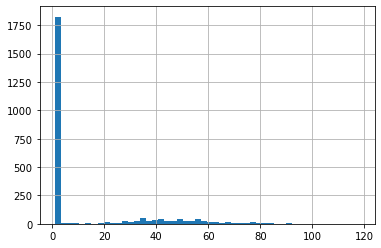

In [123]:
plen.hist(bins=50)

In [83]:
dfa[para_col] = dfa.paragraphs.progress_map(split_multiple_sentences)

100%|█████████████████████████████████████████████████████████████████████████████| 2426/2426 [00:14<00:00, 164.45it/s]


## Topic Scores